# Image processing for tracking larva trajectory and tail kinematic


Author: [Adrien Jouary](http://www.ibens.ens.fr/spip.php?rubrique23&lang=fr)
To be published

DOI: ??? URL: <http://???>/


This [Jupyter](http://jupyter.org/) notebook is an electronic supplementry material of the article.


## Load configuration, function and plotting style configuration

In [9]:
%run  FunctionImageTracking.py
%matplotlib inline

## Image Processing

### Compute Head Position and Orientation:

<function __main__.ImageProcessing>

/home/adrien/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


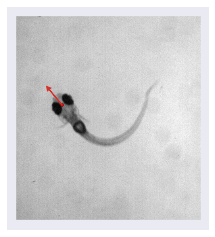

In [7]:
def ImageProcessing(k):
    
    img=plt.imread('../Data/ImgLarva/ImgLarva'+str(k)+'.tif')
    BwBody=Binarize(img,4,200)
    BwHead=img<25 
    BwHead = skimage.morphology.remove_small_objects(BwHead>0,100)  
    props=skimage.measure.regionprops(BwHead)[0]
    ell=FitEllipse(BwHead)
    ell.Angle=ell.Angle+pi/2
    X=np.nonzero(BwBody)
    if (sum((X[0]-ell.cx)*np.cos(ell.Angle)+(X[1]-ell.cy)*np.sin(ell.Angle)))>0:
        ell.Angle=ell.Angle+pi
    
    
    
    plt.imshow(img, cmap=plt.cm.gray)
    plt.scatter(ell.cx,ell.cy,s=10,c=[1,0,0])
    
    plt.arrow(ell.cx,ell.cy,50*np.cos(ell.Angle),50*np.sin(ell.Angle), head_width=11, head_length=10, fc=Re, ec=Re,linewidth=1)
    
    plt.xticks([])
    plt.yticks([])
    
interact(ImageProcessing,k=(0,33,1))      

### Compute Tail Deflection:

1


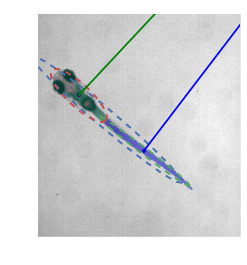

In [8]:
def ImageProcessing(k):
    img=plt.imread('../Data/ImgLarva/ImgLarva'+str(k)+'.tif')
    BwBody=Binarize(img,2,200)
    
    Ellipse0=FitEllipse(BwBody)
    
    SplitEllipse(BwBody,img,Ellipse0,1)
    
    
interact(ImageProcessing,k=(0,33,1))      